In [1]:
include("OQS_Tools_v1.jl")
using Plots
using ITensors
using ITensorMPS
using LinearAlgebra
using PolyChaos
using .OQS_Tools_v1
BLAS.set_num_threads(4)
ITensors.enable_threaded_blocksparse(false)

false

In [ ]:
D = 1.0 #bandwidth
bath_shape = "elliptical" #bath spectral density shape
g = 0.5 #system-bath coupling
N = 50 #number of bath sites
beta = 10.0 #inverse temperature
mu = 0.0 #chemical potential
Es = 0.0 #system onsite energy
sys = N+1
sys_occ = 0.0 #system initial occupation
dt = 0.1 #time step
tmax = 10.0 #maximum time

30.0

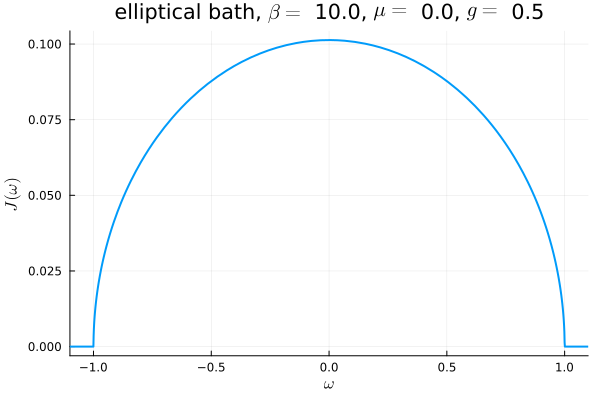

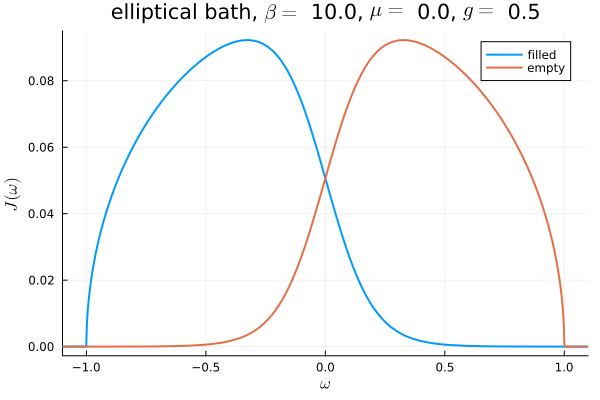

([0.404243128079739, 0.37453289775043386, 0.2589664924364857, 0.13998391467304697, 0.05469132915304518, 0.014554302102307274, 0.002647350808455436, 0.0003442303011435437, 3.3621131475136254e-5, 2.5660031233349614e-6  …  -1.727732881221966e-10, -1.727671967140742e-10, -1.727589229761216e-10, -1.7275015544517394e-10, -1.7274238895055176e-10, -1.727343951278661e-10, -1.727256307817366e-10, -1.7271658481118154e-10, -1.727080808848958e-10, -1.7269945039737838e-10], [0.2820947916598066, 0.2942575289579381, 0.3395896809194139, 0.40110917153956055, 0.45408174875920876, 0.48515707392319807, 0.4967510042526754, 0.49950380602484906, 0.4999444023427444, 0.49999521985503126  …  0.49999999865382216, 0.4999999986192688, 0.4999999985847159, 0.4999999985501639, 0.4999999985156135, 0.4999999984810654, 0.49999999844651877, 0.4999999984119732, 0.49999999837743025, 0.4999999983428888])

In [3]:
J = create_spectral(bath_shape, D, g)
display(plot(J,xlabel="\$ \\omega \$", ylabel="\$ J(\\omega) \$", title="$bath_shape bath, \$\\beta=\$ $beta, \$ \\mu=\$ $mu, \$g=\$ $g", label="", lw=2, xlims=(-1.1D,1.1D)))
J1, J2 = thermofield_transform(J, beta, mu)
p = plot(J1,xlabel="\$ \\omega \$", ylabel="\$ J(\\omega) \$", title="$bath_shape bath, \$\\beta=\$ $beta, \$ \\mu=\$ $mu, \$g=\$ $g", label="filled", lw=2, xlims=(-1.1D,1.1D))
plot!(p, J2, label="empty", lw=2)
display(p)
E1, h1 = chain_map(J1, N, D)
E2, h2 = chain_map(J2, N, D)


In [4]:
H_mat = make_H_matrix(E1, E2, h1, h2, Es, N)
C0 = prepare_correlations(N, sys_occ)

psi0, sites, states = prepare_MPS(N, sys_occ)
H_mpo = make_H_mpo(E1, E2, h1, h2, sites, Es, N, sys)

MPO
[1] ((dim=4|id=205|"Link,l=1") <Out>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=2|id=781|"Fermion,Site,n=1")' <Out>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1, (dim=2|id=781|"Fermion,Site,n=1") <In>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1)
[2] ((dim=4|id=205|"Link,l=1") <In>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=4|id=815|"Link,l=2") <Out>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=2|id=550|"Fermion,Site,n=2")' <Out>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1, (dim=2|id=550|"Fermion,Site,n=2") <In>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1)
[3] ((dim=4|id=815|"Link,l=2") <In>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=4|id=412|"Link,l=3") <Out>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=2|id=945|"Fermion,Site,n=3")' <Out>
 1: QN("N

In [ ]:
ts = collect(dt:dt:tmax)
nSys_exact = zeros(length(ts))

psi, nSys_mps = evolve_MPS(psi0, H_mpo, sys, dt, tmax)
nSys_exact .= evolve_correlations.(C0, H_mat, ts, N)[N+1,N+1]

p = plot(ts, nSys_exact, xlabel="Time", ylabel="Occupation", title="$bath_shape bath, \$\\beta=\$ $beta, \$ \\mu=\$ $mu, \$g=\$ $g", c=:blue, label="Exact", lw=2)
plot!(p, nSys_mps, label="MPS", c=:red, lw=2)

timestep 1 of 300 complete
timestep 2 of 300 complete
timestep 3 of 300 complete
timestep 4 of 300 complete
timestep 5 of 300 complete
timestep 6 of 300 complete
timestep 7 of 300 complete
timestep 8 of 300 complete
timestep 9 of 300 complete
timestep 10 of 300 complete
timestep 11 of 300 complete
timestep 12 of 300 complete
timestep 13 of 300 complete
timestep 14 of 300 complete
timestep 15 of 300 complete
timestep 16 of 300 complete
timestep 17 of 300 complete
timestep 18 of 300 complete
timestep 19 of 300 complete
timestep 20 of 300 complete
timestep 21 of 300 complete
timestep 22 of 300 complete
timestep 23 of 300 complete
timestep 24 of 300 complete
timestep 25 of 300 complete
timestep 26 of 300 complete
timestep 27 of 300 complete
timestep 28 of 300 complete
timestep 29 of 300 complete
timestep 30 of 300 complete
timestep 31 of 300 complete
timestep 32 of 300 complete
timestep 33 of 300 complete
timestep 34 of 300 complete
timestep 35 of 300 complete

In [ ]:
#psi, nSys_mps = evolve_MPS(psi0, H_mpo, sys, dt, tmax)

#c = cgrad([:blue, :green], [-0.5,0.0,1.0])
anim = @animate for t in dt:dt:tmax
        C = evolve_correlations(C0, H_mat, t, N)
        p = heatmap(abs.(C), title="Time = $t", xlabel="Site Index", ylabel="Site Index", color=:viridis, clim=(0.0,1.0))
        end
gif(anim, "corr_evolution_chain.gif", fps=30)


In [ ]:
nSys = zeros(2N+1, 2N+1)
anim = @animate for t in dt:dt:tmax
     C = evolve_correlations(C0, H_mat, t, N)
     nSys = diag(C)
     plot(-N:N, real(nSys), title="Time", xlabel="Chain Site", ylabel="Occupation", lw=2, label="")
    end
gif(anim, "nSys.gif", fps=30)

In [ ]:
#exact solution in star basis

fermi = k -> 1 / (1 + exp(beta*(k - mu)))

N = 500
omegas = collect(range(-D,D,N))
fs = zeros(N)
fs = fermi.(omegas)
couplings = zeros(N)
couplings .= sqrt.(J.(omegas)) ./ sqrt(N)
H = zeros(N+1, N+1)
H[2:end,1] .= couplings
H[1,2:end] .= couplings
H[diagind(H)[2:end]] .= omegas

C0 = zeros(N+1, N+1)
C0[diagind(C0)[2:end]] .= fs

function evolve(t)
    U = exp(-im * t * H)
    C = U * C0 * U'
    return C
end


